In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

In [2]:
def getFilename(string):
    filename = ''
    for i in string:
        if i == '/':
            filename = ''
        else:
            filename += i
    return filename

newSmoothing = pd.read_excel('area_under_peaks_printout.xlsx')
allFeatures = pd.read_excel('AllFeatures_Nate.xls')

for i in range(newSmoothing.shape[0]):
    filename = getFilename(newSmoothing.loc[i, 'filename'])
    for j in range(allFeatures.shape[0]):
        if allFeatures.loc[j, 'Filename'] == filename:
            allFeatures.loc[j, 'Smoothing Error'] = newSmoothing.loc[i, 'smoothing_error']

allFeatures.loc[:, 'Inverse Standard Deviation'] = 1/allFeatures.loc[:, 'Inverse Standard Deviation']
allFeatures.loc[:, 'Smoothing Error'] = 1/allFeatures.loc[:, 'Smoothing Error']

allFeatures.replace([np.inf, -np.inf], np.nan, inplace=True)
allFeatures.dropna()

allFeatures.iloc[:, 1:] /= allFeatures.iloc[:, 1:].max()
#print(allFeatures.head)
#allFeatures.loc[:, 'Inverse Standard Deviation'] = 1/allFeatures.loc[:, 'Inverse Standard Deviation']
#allFeatures.loc[:, 'Smoothing Error'] = 1/allFeatures.loc[:, 'Smoothing Error']

print(allFeatures)
clusters = pd.read_excel('Clusters_Final.xls')

                                              Filename  Ratio of Peaks Found  \
0    AeAeg_Aag2_eGFPIP2B_AK.24_35.trim.fastq.uq.pol...              0.227273   
1    AeAeg_CCL-125cells_CHIKV.24_35.trim.fastq.uq.p...              0.666667   
2    AeAeg_Aag2_SBV2_AK.24_35.trim.fastq.uq.polyn.5...              0.208333   
3    AeAeg_Female_Soma.24_35.trim.fastq.uq.polyn.5t...              0.666667   
4    AeAeg_Ovary_BF72h_cat.24_35.trim.fastq.uq.poly...              0.285714   
..                                                 ...                   ...   
325  Dmel_DmD16-c3_cellline.24_35.trim.fastq.uq.pol...              0.375000   
326  Dmel_12-24hr_embryo.24_35.trim.fastq.uq.polyn....              0.285714   
327  Dmel_OvaryBeta_RAL358_sRNA.24_35.trim.fastq.uq...              0.333333   
328  Dmel_HI-N17_sRNA.24_35.trim.fastq.uq.polyn.5to...              0.187500   
329  Dmel_WRR1cells_BetaE.24_35.trim.fastq.uq.polyn...              0.315789   

     Ratio of Peaks to Ideal  Ratio of 

In [3]:
best = clusters.iloc[:, 5]
best = best.dropna()
file2feature = dict()

for i in range(best.shape[0]):
    filename = best.iloc[i]
    #print(filename)
    for j in range(allFeatures.shape[0]):
        if filename == allFeatures.iloc[j, 0]:
            file2feature[filename] = allFeatures.loc[j, 'Ratio of Peaks Found'], allFeatures.loc[j, 'Ratio of Peaks to Ideal'], allFeatures.loc[j, 'Ratio of Range'], allFeatures.loc[j, 'Inverse Standard Deviation'], allFeatures.loc[j, 'Smoothing Error'], allFeatures.loc[j, 'Area Under the Curve'], allFeatures.loc[j, 'Normed Area Under the Curve']
            break

In [4]:
ranks = np.loadtxt('QualitativeClusters.txt')
file2rank = dict()

for i in range(ranks.shape[0]):
    file2rank[best.iloc[i]] = int(ranks[i])
print(file2rank)

{'AeAeg_Female_Ovary_BetaE.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 5, 'AeAeg_Mid_DissToCar_4dpf_JM.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 46, 'AeAeg_Whole_fem_ZA.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 20, 'AeAeg_Ovary_BF48h_cat.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 14, 'AeAeg_Mid_dsDV_4dpf_JM.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 44, 'AeAeg_ORL_pBac3EB2Mos_r2.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 27, 'AeAeg_Female_Ovary.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 11, 'AeAeg_Testes.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 12, 'AeAeg_Embryo_0-1h.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 34, 'AeAeg_Female_Whole.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 45, 'AeAeg_Fcarc_TC.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 25, 'AeAeg_Mid_No_diss_4dpf_JM.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 43, 'AeAeg_Ovary_NonBF_cat.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 9, 'AeAeg_Whole_ZIKV_BM2_GP.24_35.trim.fastq.uq.polyn.5to5_SPECIES.xls': 32, 'Aa

In [5]:
def find_error(file2rank, rankings):
    error = 0
    for i in range(len(rankings)):
        error += abs(file2rank[rankings[i]] - (i+1))
    return error

def error2prob(errors):
    errorList = errors[:]
    def find_max(errorList):
        ans = 0
        for val in errorList:
            if val > ans:
                ans = val
        return ans
    
    max = find_max(errorList)
    for index in range(len(errorList)):
        errorList[index] = max - errorList[index]
    
    try:
        summ = sum(errorList)
        for index in range(len(errorList)):
            errorList[index] /= summ
    except ZeroDivisionError:
        #return None
        return [1/len(errorList) for _ in range(len(errorList))]
    
    return errorList

[53, 17, 91, 39, 46, 71, 80] 831
[53, 17, 91, 54, 46, 71, 80] 801
[53, 17, 66, 54, 46, 71, 80] 797
[53, 17, 66, 54, 46, 5, 80] 727
[53, 17, 9, 54, 46, 5, 95] 719
[53, 17, 9, 55, 46, 5, 95] 717
[53, 17, 9, 100, 46, 5, 95] 715
[11, 17, 9, 76, 46, 5, 95] 709
[11, 17, 9, 61, 46, 5, 95] 703
[8, 46, 54, 61, 53, 0, 95] 695
[10, 3, 16, 10, 18, 2, 93] 677
[2, 58, 61, 3, 7, 9, 96] 667
[2, 9, 61, 3, 7, 9, 96] 661
[0, 87, 54, 10, 13, 0, 90] 633
[2, 0, 12, 0, 18, 5, 98] 629


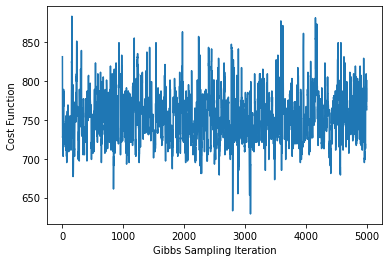

[2, 0, 12, 0, 18, 5, 98]


In [6]:
weights = [random.randint(0, 100) for _ in range(7)]
finalWeights = None
errorVal = np.inf

allFilenames = list(file2rank.keys())
finalErrors = []
for _ in range(5000): 
    index = random.choice([i for i in range(7)])
    
    x = list(range(101))
    y = list()
    allErrors = []
    for j in range(101):
        allScores = []
        for key in file2feature.keys():
            
            features = list(file2feature[key])
            weights[index] = j
            
            score = 0
            for k in range(len(features)):
                score += features[k]*weights[k]
            allScores.append(score)
            
        rankings = [x for _,x in sorted(zip(allScores, allFilenames))]
        error = find_error(file2rank, rankings)
        allErrors.append(error)
    
    prob = error2prob(allErrors)
    if prob == None:
        continue
    weights[index] = random.choices(x, weights=prob)[0]
    
    finalErrors.append(allErrors[weights[index]])
    if allErrors[weights[index]] < errorVal:
        errorVal = allErrors[weights[index]]
        finalWeights = weights[:]
        print(finalWeights, errorVal)
    #print(weights, allErrors[weights[index]])

plt.plot([i for i in range(len(finalErrors))], finalErrors)
plt.xlabel('Gibbs Sampling Iteration')
plt.ylabel('Cost Function')
plt.show()

print(finalWeights)
            

In [7]:
def find_max(l):
    max = 0
    for i in l:
        if i > max:
            max = i
    return max

max = find_max(finalWeights)
adjWeights = []
for i in finalWeights:
    adjWeights.append(i/max)

trueScores = []
trueFiles = []
for key in file2rank.keys():
    trueFiles.append(key)
    trueScores.append(file2rank[key])

trueRankings = [x for _,x in sorted(zip(trueScores, trueFiles))]

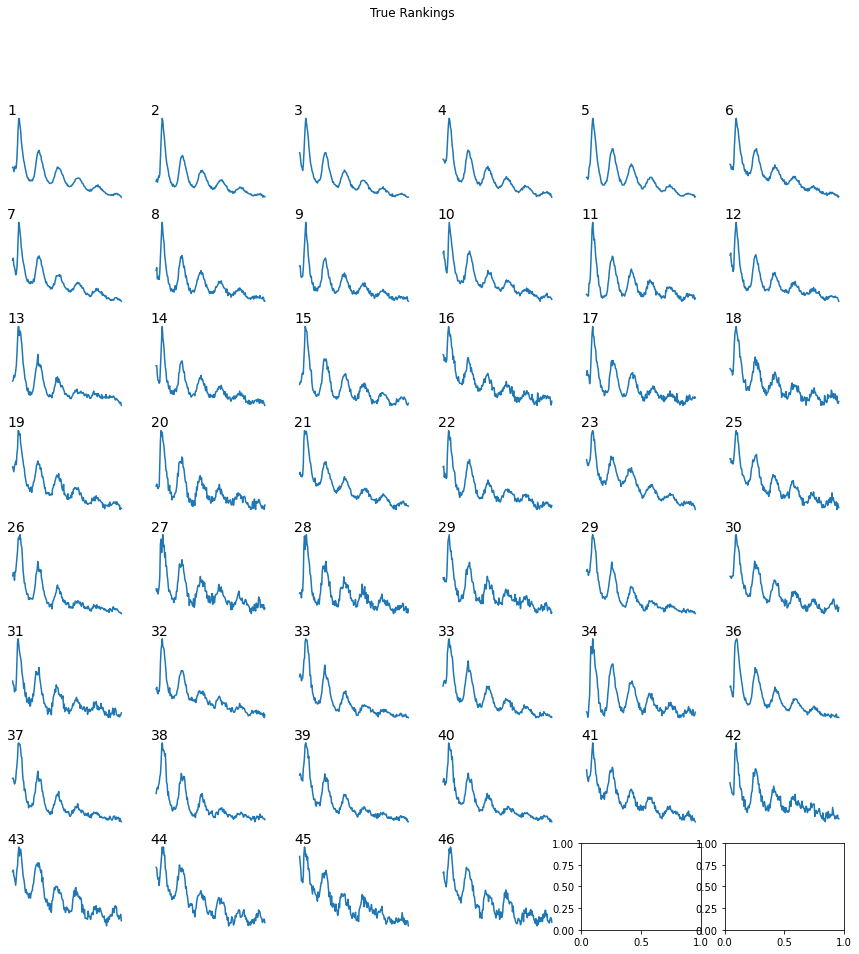

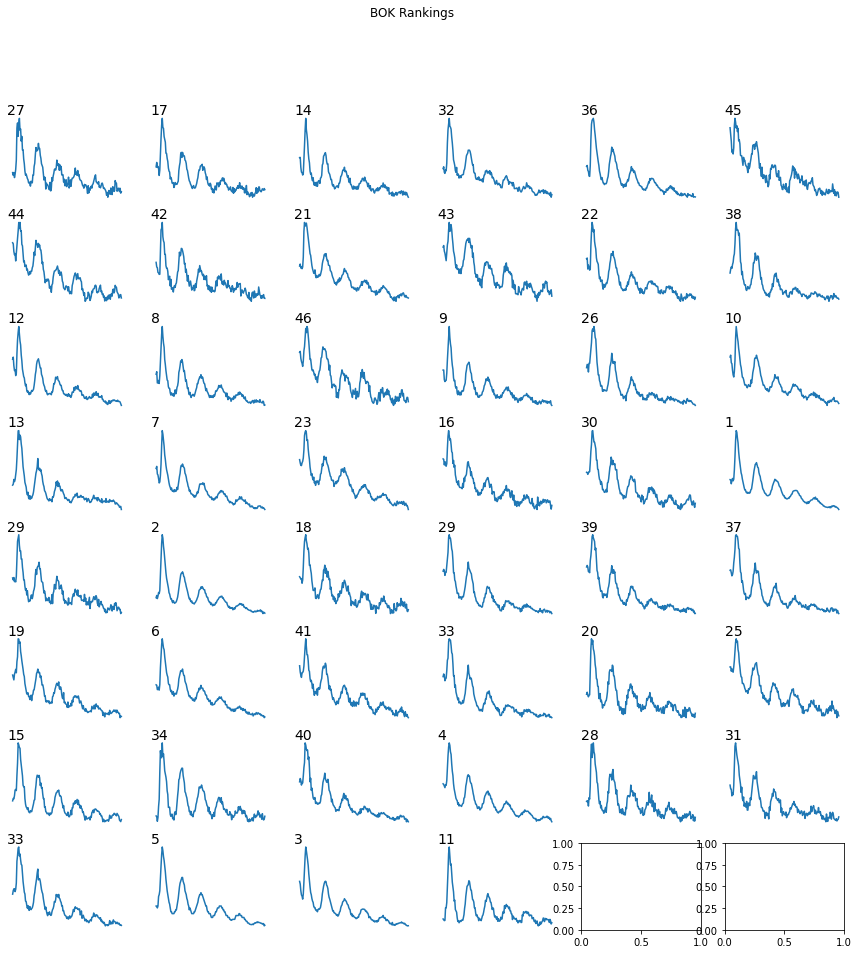

In [8]:
def get_directory(filename):
    for i in range(len(filename)):
        if filename[i] == '_':
            if filename[0:i] == 'AaAeg':
                return 'AeAeg2/'
            else:
                return filename[0:i] +  '2/'

def dimensions(num):
    n, m = 1, 1

    while n * m != num:
        if n * m < num:
            n += 1
            m += 1
        elif n * m > num:
            m -= 1

    if (n == 1 or m == 1) and num > 4:
        num += 1
        return dimensions(num)

    if (n == 2 or m ==2) and num > 8:
        num += 1
        return dimensions(num)
    return n, m

def removeData(data, thresh):
    x, y = data.shape
    for i in range(1, x):
        if int(data[i, 0]) >= thresh:
            return data[i:398, :]

n, m = dimensions(len(trueRankings))
fig1, ax1 = plt.subplots(n, m)
fig1.set_figheight(15)
fig1.set_figwidth(15)
fig1.suptitle('True Rankings')
ax1 = ax1.ravel()

for filename, ax in zip(trueRankings, ax1):
    directory = get_directory(filename)
    try:
        graph = pd.read_excel(directory+filename)
    except:
        graph = pd.read_csv(directory+filename, sep='\t')

    graph = graph.to_numpy()
    graph = removeData(graph, 20)
    
    ax.plot(graph[:, 0], graph[:, 1])
    ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0, 1, file2rank[filename], transform=ax.transAxes, fontsize = 14)
plt.show()

newScores = []
for filename in allFilenames:
    features = list(file2feature[filename])
    
    score = 0
    for k in range(len(features)):
        score += features[k]*weights[k]
    newScores.append(score)
    
BOKRankings = [x for _,x in sorted(zip(newScores, allFilenames))]

fig2, ax2 = plt.subplots(n, m)
fig2.set_figheight(15)
fig2.set_figwidth(15)
fig2.suptitle('BOK Rankings')
ax2 = ax2.ravel()

for filename, ax in zip(BOKRankings, ax2):
    directory = get_directory(filename)
    try:
        graph = pd.read_excel(directory+filename)
    except:
        graph = pd.read_csv(directory+filename, sep='\t')

    graph = graph.to_numpy()
    graph = removeData(graph, 20)
    
    ax.plot(graph[:, 0], graph[:, 1])
    ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0, 1, file2rank[filename], transform=ax.transAxes, fontsize = 14)
plt.show()